In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def ReLU(preactivation):
    activation = np.where(preactivation>0, preactivation, 0)
    return activation

In [5]:
# phi and psi as a list 
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):
    # From input to 1st hidden layer
    layer1_pre_1 = theta[1, 0] + theta[1, 1] * x
    layer1_pre_2 = theta[2, 0] + theta[2, 1] * x
    layer1_pre_3 = theta[3, 0] + theta[3, 1] * x
    # Activation of the 1st hidden layer
    h1 = activation_fn(layer1_pre_1)
    h2 = activation_fn(layer1_pre_2)
    h3 = activation_fn(layer1_pre_3)

    # From 1st hidden layer to 2nd hidden layer
    layer2_pre_1 = psi[1, 0] + psi[1, 1] * h1 + psi[1, 2] * h2 + psi[1, 3] * h3
    layer2_pre_2 = psi[2, 0] + psi[2, 1] * h1 + psi[2, 2] * h2 + psi[2, 3] * h3
    layer2_pre_3 = psi[3, 0] + psi[3, 1] * h1 + psi[3, 2] * h2 + psi[3, 3] * h3

    # Activation of the 2nd hidden layer
    h1_prime = activation_fn(layer2_pre_1)
    h2_prime = activation_fn(layer2_pre_2)
    h3_prime = activation_fn(layer2_pre_3)

    # Output
    y = phi[0] + phi[1] * h1_prime + phi[2] * h2_prime + phi[3] * h3_prime

    return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi[1] * h1_prime, phi[2] * h2_prime, phi[3] * h3_prime


In [6]:
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):
    
    fig, ax = plt.subplots(3, 3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0, 0].plot(x, layer2_pre_1, 'r-'); ax[0, 0].set_ylabel('Layer 2 Preactivation')
    ax[0, 1].plot(x, layer2_pre_2, 'b-'); ax[0, 1].set_ylabel('Layer 2 Preactivation')
    ax[0, 2].plot(x, layer2_pre_3, 'g-'); ax[0, 2].set_ylabel('Layer 2 Preactivation')
    ax[1, 0].plot(x, h1_prime, 'r-'); ax[1, 0].set_ylabel("Layer 2 Activation")
    ax[1, 1].plot(x, h2_prime, 'b-'); ax[1, 1].set_ylabel("Layer 2 Activation")
    ax[1, 2].plot(x, h3_prime, 'g-'); ax[1, 2].set_ylabel("Layer 2 Activation")
    ax[2, 0].plot(x, phi1_h1_prime, 'r-'); ax[2, 0].set_ylabel("Weighted Output")
    ax[2, 1].plot(x, phi2_h2_prime, 'b-'); ax[2, 1].set_ylabel("Weighted Output")
    ax[2, 2].plot(x, phi3_h3_prime, 'g-'); ax[2, 2].set_ylabel("Weighted Output")

    # 축 범위 설정
    for plot_y in range(3):
        for plot_x in range(3):
            ax[plot_y, plot_x].set_xlim([0, 1]); ax[plot_x, plot_y].set_ylim([-1, 1])
            ax[plot_y, plot_x].set_aspect(0.5) # 가로가 길쭉한 그래프
        ax[2, plot_y].set_xlabel('Input');
    plt.show()

    # 최종 출력 그래프 표시
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('Input'); ax.set_ylabel('Output')
    ax.set_xlim([0, 1]); ax.set_ylim([-1, 1])
    ax.set_aspect(0.5)
    plt.show()

0.0


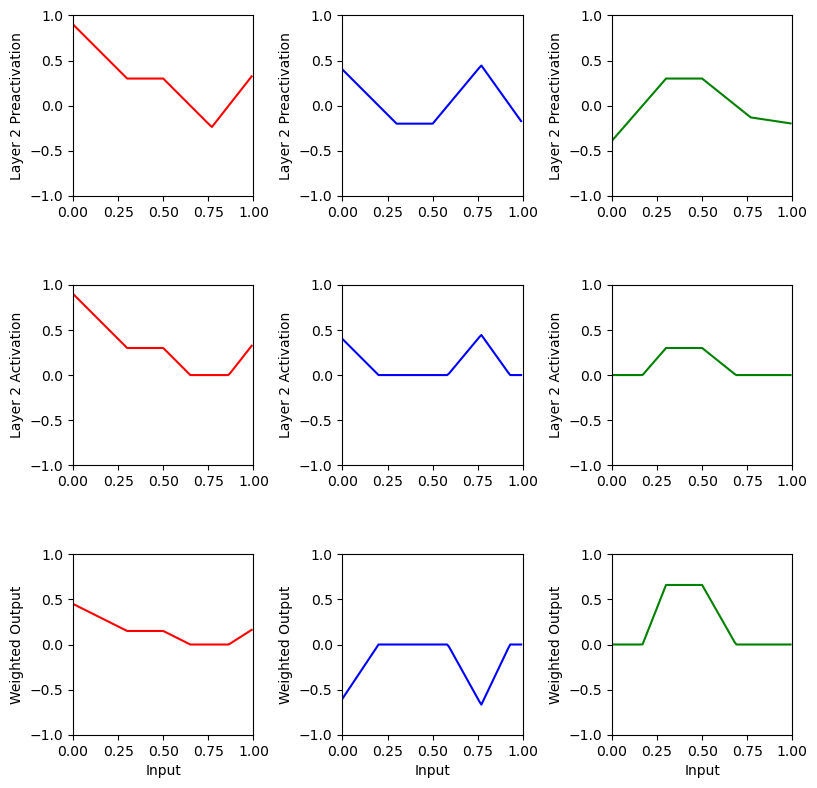

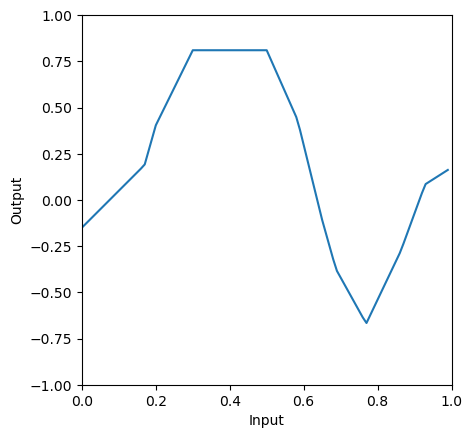

In [10]:
# 신경망 파라미터 설정
theta = np.zeros([4, 2]) # From input to 1st hidden layer # of hidden units=4, # ouf (input+bias)=2 
"""원래 [3,2]면 되는데, Parameter Notation을 맞추기 위해서 [4,2]로 선언한 것임"""
print(theta[0,0]) # 이걸 보면 알 수 있음



psi = np.zeros([4, 4]) # From 1st hidden layer to 2nd hidden layer # of hidden units = 3, bias = 1
"""이것도 원래 [3,4]면 되는데, Parameter notation을 맞추기 위해서 [4,4]로 선언한 것임"""

phi = np.zeros([4, 1]) # input dim = 4(hidden units 3 + bias 1), output dim = 1
"""이건 진짜 [4,1]이어야 함"""

# Initialization of parameters 
theta[1, 0] = 0.3; theta[1, 1] = -1.0
theta[2, 0] = -1.0; theta[2, 1] = 2.0
theta[3, 0] = -0.5; theta[3, 1] = 0.65
psi[1, 0] = 0.3; psi[1, 1] = 2.0; psi[1, 2] = -1.0; psi[1, 3] = 7.0
psi[2, 0] = -0.2; psi[2, 1] = 2.0; psi[2, 2] = 1.2; psi[2, 3] = -8.0
psi[3, 0] = 0.3; psi[3, 1] = -2.3; psi[3, 2] = -0.8; psi[3, 3] = 2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi[3] = 2.2

# set the range of input 
x = np.arange(0, 1, 0.01)
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# Visualization 
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

"""앞서 살펴봤듯, 어떤 그래프가 그려질지 미리 판단하는 것은 레이어가 깊어질수록 알기 힘들다"""